## Install OpenCV

In [1]:
# If New Session Uncomment Line Below and Run
# Once OpenCV Installed Re-Comment Line Below and Restart Kernel & Clear Output
# --------------------------------------------------
# ! pip install opencv-python

## Imports

In [2]:
# Python Modules
# --------------------------------------------------
import os
import sys
import numpy             as np 
import pandas            as pd 
import matplotlib.pyplot as plt


# Custom Modules
# --------------------------------------------------
PATH = os.path.abspath(os.path.join(".."))

if PATH not in sys.path:
    sys.path.append(PATH)
    
import config
import utils

Using TensorFlow backend.


## Load Model

In [3]:
model, _ = utils.load_model(
    config.BEST_MODEL_PATH, 
    config.BEST_WEIGHT_PATH, 
    config.BEST_MODEL_HISTORY
)

## View Model Summary

In [4]:
model.get_layer(model.layers[0].name).summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 14, 14, 512)       14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

## Predict

Dicom File: dicom/test1.dcm


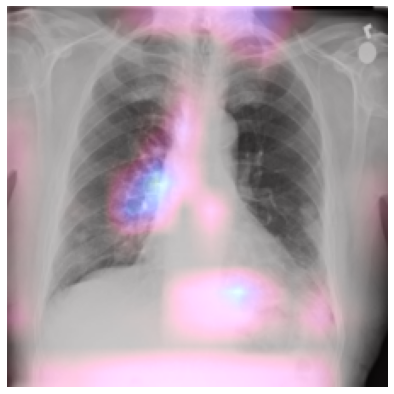

True: No Finding
Pred: Pneumonia (62%)

--------------------------------------------------

Dicom File: dicom/test2.dcm


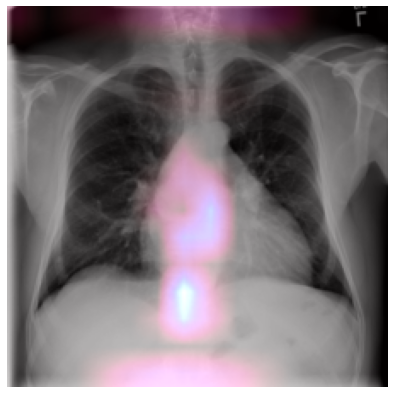

True: Cardiomegaly
Pred: No Pneumonia (41%)

--------------------------------------------------

Dicom File: dicom/test3.dcm


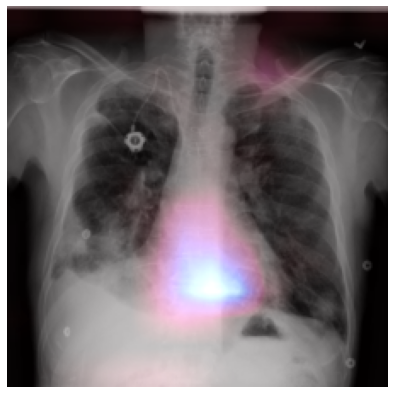

True: Effusion
Pred: Pneumonia (77%)

--------------------------------------------------

Dicom File: dicom/test4.dcm
dicom/test4.dcm is not suitable for model...

Patient Position: PA
Modality:         DX
Body Part:        RIBCAGE
--------------------------------------------------

Dicom File: dicom/test5.dcm
dicom/test5.dcm is not suitable for model...

Patient Position: PA
Modality:         CT
Body Part:        CHEST
--------------------------------------------------

Dicom File: dicom/test6.dcm
dicom/test6.dcm is not suitable for model...

Patient Position: XX
Modality:         DX
Body Part:        CHEST
--------------------------------------------------



In [6]:
for i in config.TEST_DICOMS:
    
    # Load DICOM Image
    # --------------------------------------------------
    img             = np.array([])
    orig_img, label = utils.check_dicom(i)
    
    if orig_img is None:
        continue
        
        
    # Display Image
    # --------------------------------------------------
    cam = utils.get_class_activation_mapping(model, orig_img)
    
    plt.figure(figsize = (7, 7))
    plt.imshow(cam)
    plt.axis("off")
    plt.show()

        
    # Preprocess Image
    # --------------------------------------------------
    img = utils.preprocess_image(
        img      = orig_img,  
        img_mean = config.IMAGENET_MU, 
        img_std  = config.IMAGENET_SIGMA, 
        img_size = config.INPUT_IMG_SIZE
    )
    
    
    # Predict Image
    # --------------------------------------------------
    pred, prob = utils.predict_image(
        model  = model, 
        img    = img, 
        thresh = config.BEST_THRESH
    )

    
    # Log Results
    # --------------------------------------------------
    print(
        f"True: {label}\n"
        f"Pred: {pred} ({int(round(prob, 2) * 100)}%)\n"
        f"\n"
        f"--------------------------------------------------\n"
    )